<a href="https://colab.research.google.com/github/fikrifaizz/indo-sentiment-engine/blob/main/notebooks/baseline_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, f1_score

In [2]:
train = pd.read_parquet("../data/final/train.parquet")
test = pd.read_parquet("../data/final/test.parquet")
print("Data Loaded.")
print(f"Train Shape: {train.shape}")
print(f"Test Shape : {test.shape}")

Data Loaded.
Train Shape: (24630, 3)
Test Shape : (5279, 3)


In [4]:
STOPWORDS_ID = [
    "yang", "di", "dan", "itu", "ini", "ke", "akan", "pada", "juga", "saya", 
    "untuk", "adalah", "dengan", "bisa", "kami", "anda", "aku", "dia"
]

print("\nVectorizing text (TF-IDF)...")
start_time = time.time()

vectorizer = TfidfVectorizer(
    stop_words=STOPWORDS_ID, 
    max_features=5000,
    ngram_range=(1, 2)
)

X_train = vectorizer.fit_transform(train['clean_text'])
y_train = train['label']

X_test = vectorizer.transform(test['clean_text'])
y_test = test['label']

print(f"Vocab Size: {len(vectorizer.get_feature_names_out())}")
print(f"Waktu Vectorization: {time.time() - start_time:.2f} detik")


Vectorizing text (TF-IDF)...
Vocab Size: 5000
Waktu Vectorization: 0.34 detik


In [12]:
print("\nTraining Logistic Regression...")
model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

start_train = time.time()
model.fit(X_train, y_train)
print(f"Waktu Training: {time.time() - start_train:.2f} detik")


Training Logistic Regression...
Waktu Training: 0.12 detik



Evaluasi pada Test Set...
Kecepatan Prediksi: 0.0005 ms/sample

              precision    recall  f1-score   support

     Negatif       0.55      0.76      0.64       496
      Netral       0.14      0.39      0.21       230
     Positif       0.97      0.85      0.91      4553

    accuracy                           0.82      5279
   macro avg       0.56      0.67      0.58      5279
weighted avg       0.90      0.82      0.85      5279



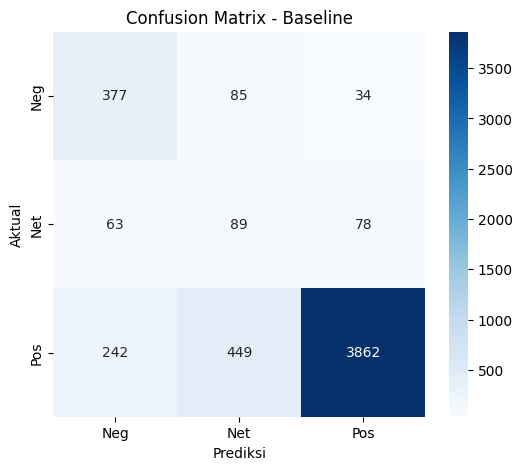

In [13]:
print("\nEvaluasi pada Test Set...")

start_pred = time.time()
y_pred = model.predict(X_test)
inference_time = (time.time() - start_pred) / len(test) * 1000 

print(f"Kecepatan Prediksi: {inference_time:.4f} ms/sample")

report = classification_report(y_test, y_pred, target_names=['Negatif', 'Netral', 'Positif'])
print("\n" + report)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Neg', 'Net', 'Pos'], 
            yticklabels=['Neg', 'Net', 'Pos'])
plt.title('Confusion Matrix - Baseline')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

In [14]:
print("\nSanity Check (Tes Manual):")
custom_sentences = [
    "Barang sampai dengan selamat, packing rapi banget", # Positif
    "Pengiriman lama banget woy, barang penyok dikit",   # Negatif
    "Barang standar aja sih sesuai harga",               # Netral
    "Ga tau cara pakainya bingung"                       # Negatif/Netral
]

custom_vec = vectorizer.transform(custom_sentences)
preds = model.predict(custom_vec)
label_map = {0: 'Negatif', 1: 'Netral', 2: 'Positif'}

for text, label in zip(custom_sentences, preds):
    print(f"   '{text}' -> {label_map[label]}")


Sanity Check (Tes Manual):
   'Barang sampai dengan selamat, packing rapi banget' -> Positif
   'Pengiriman lama banget woy, barang penyok dikit' -> Netral
   'Barang standar aja sih sesuai harga' -> Netral
   'Ga tau cara pakainya bingung' -> Netral
